## Twitter Customer Support Dataset Anlyasis

I will be analyzing the _Customer Support on Twitter_ dataset that contains tweets, replies, and author IDs of both companies and inquiring users. The customer support is facilitated by chatbots, and this dataset will reveal inights on the language used, traffic stats on an anual and weekly level, and top users to name a few.

This dataset contains 2,811,774 rows and 7 variables.

### Column/Variable Descriptions

> ‘tweet_id’: Identifies the tweet, and is the ‘in_response_tweet_id’ that the user is replying to. <br>

> ‘author_id’: Contains the author of the tweet. The company account name will be shown, but all other non-company-users are referenced by an ID number. <br>

> ‘inbound’: A boolean value that determines who is reaching out to the company account. If TRUE, then the customer is reaching out and tagging the company account. If FALSE, then the company account is replying/tagging the customer. <br>

> ‘created_at’: Date and time of when the tweet was sent. <br>

> ‘text’: Contains the actual message contents of the tweet. <br>

> ‘response_tweet_id’: References the tweet_id that it is replying to. <br>

> ‘in_response_to_tweet_id’: An id to be referenced when this tweet is being replied to. <br>

In [971]:
# Useful imports
import pandas as pd
import numpy as np

In [5]:
# Load the dataset into notebook
dataset = pd.read_csv("twcs.csv")
dataset.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [15]:
# Shape of DataFrame
dataset.shape

(2811774, 7)

In [16]:
# Number of inbound and outbound tweets
dataset['inbound'].value_counts()

True     1537843
False    1273931
Name: inbound, dtype: int64

In [17]:
# Value type of each variable/column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [18]:
# Amount of empty values in each column
dataset.isnull().sum()

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

In [604]:
# Sum of data points from 2008-2016
eight = dataset['created_at'].str.contains(r'2008').sum()
nine = dataset['created_at'].str.contains(r'2009').sum()
ten = dataset['created_at'].str.contains(r'2010').sum()
eleven = dataset['created_at'].str.contains(r'2011').sum()
twelve = dataset['created_at'].str.contains(r'2012').sum()
thirteen = dataset['created_at'].str.contains(r'2013').sum()
fourteen = dataset['created_at'].str.contains(r'2014').sum()
fifteen = dataset['created_at'].str.contains(r'2015').sum()
sixteen = dataset['created_at'].str.contains(r'2016').sum()
seventeen = dataset['created_at'].str.contains(r'2017').sum()

not17 = eight+nine+ten+eleven+twelve+thirteen+fourteen+fifteen+sixteen
print(before2017)

2300


In [963]:
# Drop everything before 2017, as they are outliers
df = dataset[~(dataset['created_at'] < '2017-01-02')]

In [964]:
# Top authors by response
df['in_response_to_tweet_id'].value_counts()

625011.0     844
776192.0     560
37012.0      297
5965.0       185
87814.0      174
            ... 
1058186.0      1
1058185.0      1
1058183.0      1
1058181.0      1
2987950.0      1
Name: in_response_to_tweet_id, Length: 1774822, dtype: int64

In [758]:
# New dataframe to analyze author_id and dates
ac = pd.DataFrame({'author_id': df['author_id'], 
                  'created_at':df['created_at']})

In [675]:
# Top twitter users by number of tweets
tu = df['author_id'].value_counts()
tu.head(10)

AmazonHelp         169840
AppleSupport       106860
Uber_Support        56270
SpotifyCares        43265
Delta               42253
Tesco               38573
AmericanAir         36764
TMobileHelp         34317
comcastcares        33031
British_Airways     29361
Name: author_id, dtype: int64

In [676]:
# Dataframe that has top 5 users

Amzn = ac['author_id'].str.contains(pat='AmazonHelp').value_counts(sort=True)[True]
Appl = ac['author_id'].str.contains(pat='AppleSupport').value_counts(sort=True)[True]
Uber = ac['author_id'].str.contains(pat='Uber_Support').value_counts(sort=True)[True]
Spotify = ac['author_id'].str.contains(pat='SpotifyCares').value_counts(sort=True)[True]
Delta = ac['author_id'].str.contains(pat='Delta').value_counts(sort=True)[True]

top_users = pd.DataFrame([('AmazonHelp', Amzn),("AppleSupport", Appl),
('Uber_Support', Uber),('SpotifyCares', Spotify),('Delta', Delta)],
columns=('Account', '# of Entries'))
top_users

,Account,# of Entries
0,AmazonHelp,169840
1,AppleSupport,106860
2,Uber_Support,56270
3,SpotifyCares,43265
4,Delta,42253


# Top 5 Users

<AxesSubplot:title={'center':'Top Users by Number of Tweets'}, xlabel='Account', ylabel='# of Tweets'>

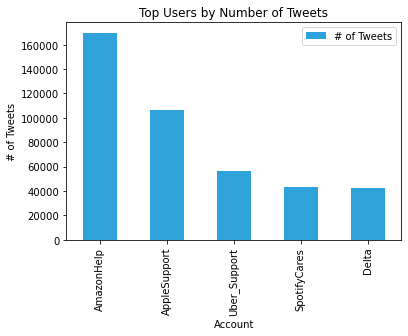

In [678]:
top_5_users = pd.DataFrame([('AmazonHelp', Amzn),("AppleSupport", Appl),
('Uber_Support', Uber),('SpotifyCares', Spotify),('Delta', Delta)],
columns=('Account', '# of Tweets'))
top_5_users.plot.bar(title='Top Users by Number of Tweets',x='Account', ylabel='# of Tweets', color=(0.18823529411764706, 0.63529411764705879, 0.85490196078431369))

# Analysis of Monthly Traffic

In [152]:
# Sum up twitter count for each month
Jan = ac['created_at'].str.contains(r'Jan').sum()
Feb = ac['created_at'].str.contains(r'Feb').sum()
Mar = ac['created_at'].str.contains(r'Mar').sum()
Apr = ac['created_at'].str.contains(r'Apr').sum()
May = ac['created_at'].str.contains(r'May').sum()
Jun = ac['created_at'].str.contains(r'Jun').sum()
Jul = ac['created_at'].str.contains(r'Jul').sum()
Aug = ac['created_at'].str.contains(r'Aug').sum()
Sep = ac['created_at'].str.contains(r'Sep').sum()
Oct = ac['created_at'].str.contains(r"Oct").sum()
Nov = ac['created_at'].str.contains(r'Nov').sum()
Dec = ac['created_at'].str.contains(r'Dec').sum()

## Twitter Count from January to September

<AxesSubplot:title={'center':'Monthly Traffic: January - Septempber'}, xlabel='Month', ylabel='# of Tweets'>

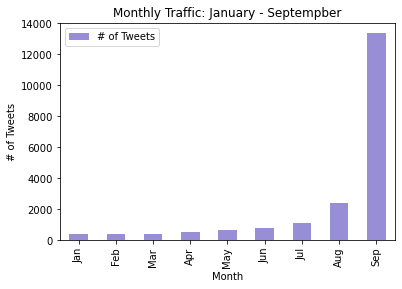

In [473]:
month_freq_jan_sep = pd.DataFrame([('Jan', Jan),('Feb', Feb),
('Mar', Mar),('Apr', Apr),('May', May),('Jun', Jun),('Jul', Jul),
('Aug', Aug),('Sep', Sep),],
columns=('Month', '# of Tweets'))
px.bar(month_freq_jan_sep,x='Month',y='# of Tweets')                                                                                                                                                                                    
month_freq_jan_sep.plot.bar(title='Monthly Traffic: January - Septempber',x='Month', ylabel='# of Tweets', color=(0.59607843137254901, 0.55686274509803924, 0.83529411764705885))

## Twitter Count From October to December

<AxesSubplot:title={'center':'Monthly Traffic: October - December'}, xlabel='Month', ylabel='# of Tweets in Millions'>

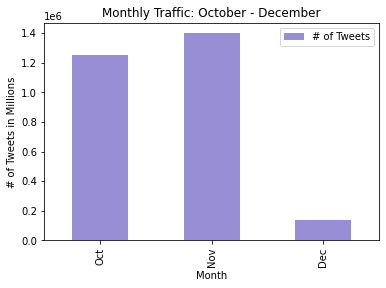

In [480]:
month_freq_oct_dec = pd.DataFrame([('Oct', Oct),('Nov', Nov),('Dec', Dec)],
columns=('Month', '# of Tweets'))
month_freq_oct_dec.plot.bar(title='Monthly Traffic: October - December',x='Month', ylabel='# of Tweets in Millions', color=(0.59607843137254901, 0.55686274509803924, 0.83529411764705885))

In [79]:
# Number of inbound and outbound tweets
df['inbound'].value_counts()

True     1537843
False    1273931
Name: inbound, dtype: int64

# Analysis of Weekly Traffic

## Weekly Traffic: All Users

In [759]:
# New dataframe with days & # of tweets by extracting first 3 letters
ac['Day of the Wk'] = ac['created_at'].str[:3]
general_inital_DOW = pd.DataFrame({'# of Tweets':ac['Day of the Wk'].value_counts()})
general_inital_DOW

,# of Tweets
Fri,453028
Wed,445838
Thu,440361
Tue,423052
Mon,387847
Sat,332606
Sun,329042


In [364]:
# Organize dataframe so wk starts on Monday
general_inital_DOW = general_inital_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
general_inital_DOW

,# of Tweets
Mon,387847
Tue,423052
Wed,445838
Thu,440361
Fri,453028
Sat,332606
Sun,329042


In [365]:
# New dataframe where days are a variable and not an index 
general_final_DOW = general_inital_DOW.reset_index(level=0)
general_final_DOW = general_final_DOW.rename(columns={'index':'Day'})
general_final_DOW

,Day,# of Tweets
0,Mon,387847
1,Tue,423052
2,Wed,445838
3,Thu,440361
4,Fri,453028
5,Sat,332606
6,Sun,329042


<AxesSubplot:title={'center':'Weekly Traffic: All Users'}, xlabel='Day'>

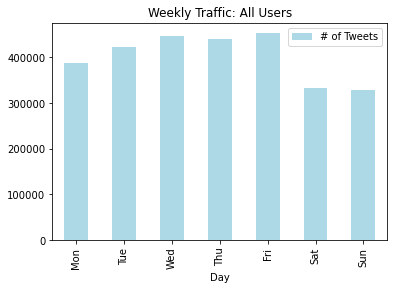

In [859]:
# Weekly traffic per day for all users
general_final_DOW.plot.bar(title='Weekly Traffic: All Users', color='#ADD8E6',x='Day', y='# of Tweets')

In [539]:
# New dataframe that contains all users to be used to compare to others
all_compare = pd.DataFrame({'All Users':ac['Day of the Wk'].value_counts()})
all_compare = all_compare.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
all_compare_final = all_compare.reset_index(level=0)
all_compare_final = all_compare_final.rename(columns={'index':'Day'})
all_compare_final

,Day,All Users
0,Mon,387847
1,Tue,423052
2,Wed,445838
3,Thu,440361
4,Fri,453028
5,Sat,332606
6,Sun,329042


## Weekly Traffic: Amazon_Support

In [353]:
# New dataframe for weekly traffic for Amazon
amazon = ac[ac['author_id'].str.contains(pat='AmazonHelp')]
amazon['Day of the Wk'] = amazon['created_at'].str[:3]
amzn_initial_DOW = pd.DataFrame({'# of Tweets':amazon['Day of the Wk'].value_counts()})
amzn_initial_DOW = amzn_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
amzn_initial_DOW

,# of Tweets
Mon,21935
Tue,25428
Wed,26858
Thu,26504
Fri,27612
Sat,21822
Sun,19681


In [354]:
amzn_final_DOW = amzn_initial_DOW.reset_index(level=0)
amzn_final_DOW = amzn_final_DOW.rename(columns={'index':'Day'})
amzn_final_DOW

,Day,# of Tweets
0,Mon,21935
1,Tue,25428
2,Wed,26858
3,Thu,26504
4,Fri,27612
5,Sat,21822
6,Sun,19681


<AxesSubplot:title={'center':'Weekly Traffic: AmazonHelp'}, xlabel='Day', ylabel='# of Tweets'>

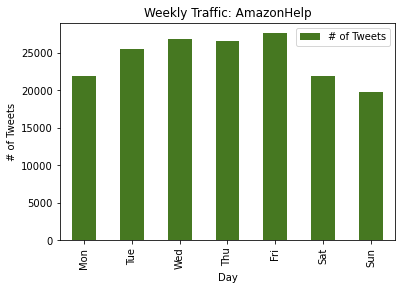

In [965]:
# Amazon weekly traffic
amzn_final_DOW.plot.bar(title='Weekly Traffic: AmazonHelp',x='Day', ylabel='# of Tweets', color=(0.27450980392156865, 0.47058823529411764, 0.12941176470588237))


In [555]:
# New dataset for Amazon to be used to compare to other users
amzn_compare = ac[ac['author_id'].str.contains(pat='AmazonHelp')]
amzn_compare['Day of the Wk'] = amzn_compare['created_at'].str[:3]
amzn_compare_inital = pd.DataFrame({'AmazonHelp':amazon['Day of the Wk'].value_counts()})
amzn_compare_inital = amzn_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
amzn_compare_final = amzn_compare_inital.reset_index(level=0)
amzn_compare_final = amzn_compare_final.rename(columns={'index':'Day'})

## Weekly Traffic: AppleSupport

In [316]:
# New dataframe for weekly traffic for AppleSupport
apple = ac[ac['author_id'].str.contains(pat='AppleSupport')]
apple['Day of the Wk'] = apple['created_at'].str[:3]
appl_initial_DOW = pd.DataFrame({'# of Tweets':apple['Day of the Wk'].value_counts()})
appl_initial_DOW = appl_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
appl_initial_DOW

,# of Tweets
Mon,15486
Tue,16155
Wed,16831
Thu,15178
Fri,14395
Sat,14068
Sun,14747


In [317]:
appl_final_DOW = appl_initial_DOW.reset_index(level=0)
appl_final_DOW = appl_final_DOW.rename(columns={'index':'Day'})
appl_final_DOW

,Day,# of Tweets
0,Mon,15486
1,Tue,16155
2,Wed,16831
3,Thu,15178
4,Fri,14395
5,Sat,14068
6,Sun,14747


<AxesSubplot:title={'center':'Weekly Traffic: AppleSupport '}, xlabel='Day', ylabel='# of Tweets'>

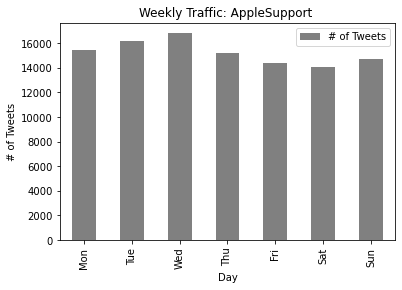

In [966]:
# AppleSupport weekly traffic
appl_final_DOW = appl_final_DOW.rename(columns={'index':'Day'})
appl_final_DOW.plot.bar(title = 'Weekly Traffic: AppleSupport ',x='Day', ylabel='# of Tweets',color = (0.50196078431372548, 0.50196078431372548, 0.50196078431372548))

In [446]:
# New dataset for AppleSupport to be used to compare to other users
appl_compare = ac[ac['author_id'].str.contains(pat='AppleSupport')]
appl_compare['Day of the Wk'] = appl_compare['created_at'].str[:3]
appl_compare_inital = pd.DataFrame({'AppleSupport':apple['Day of the Wk'].value_counts()})
appl_compare_inital = appl_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
apple_compare_final = appl_compare_inital.reset_index(level=0)
apple_compare_final = apple_compare_final.rename(columns={'index':'Day'})

## Weekly Traffic: Uber_Support

In [319]:
# New dataframe for weekly traffic for Uber_Support account
uber = ac[ac['author_id'].str.contains(pat='Uber_Support')]
uber['Day of the Wk'] = uber['created_at'].str[:3]
uber_initial_DOW = pd.DataFrame({'# of Tweets':uber['Day of the Wk'].value_counts()})
uber_initial_DOW = uber_initial_DOW.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
uber_initial_DOW

,# of Tweets
Mon,7412
Tue,8039
Wed,8068
Thu,8718
Fri,8991
Sat,7350
Sun,7692


In [320]:
uber_final_DOW = uber_initial_DOW.reset_index(level=0)
uber_final_DOW = uber_final_DOW.rename(columns={'index':'Day'})
uber_final_DOW

,Day,# of Tweets
0,Mon,7412
1,Tue,8039
2,Wed,8068
3,Thu,8718
4,Fri,8991
5,Sat,7350
6,Sun,7692


<AxesSubplot:title={'center':'Weekly Traffic: Uber_Support'}, xlabel='Day', ylabel='# of Tweets'>

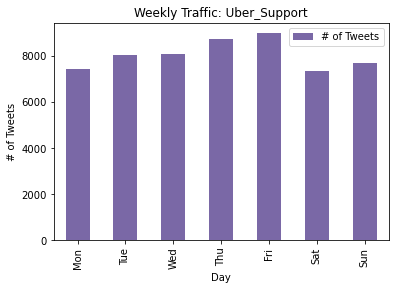

In [967]:
# Uber_Support weekly traffic
uber_final_DOW = uber_final_DOW.rename(columns={'index':'Day'})
uber_final_DOW.plot.bar(title='Weekly Traffic: Uber_Support',x='Day', ylabel='# of Tweets', color = (0.47843137254901963, 0.40784313725490196, 0.65098039215686276))

In [449]:
# New dataset for Uber_Support to be used to compare to other users
uber_compare = ac[ac['author_id'].str.contains(pat='Uber_Support')]
uber_compare['Day of the Wk'] = uber_compare['created_at'].str[:3]
uber_compare_inital = pd.DataFrame({'Uber_Support':uber['Day of the Wk'].value_counts()})
uber_compare_inital = uber_compare_inital.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
uber_compare_final = uber_compare_inital.reset_index(level=0)
uber_compare_final = uber_compare_final.rename(columns={'index':'Day'})

,Day,Uber_Support
0,Mon,7412
1,Tue,8039
2,Wed,8068
3,Thu,8718
4,Fri,8991
5,Sat,7350
6,Sun,7692


# Comparing Weekly Traffic of Top Users to Each Other

## Weekly Traffic: AmazonHelp & AppleSupport

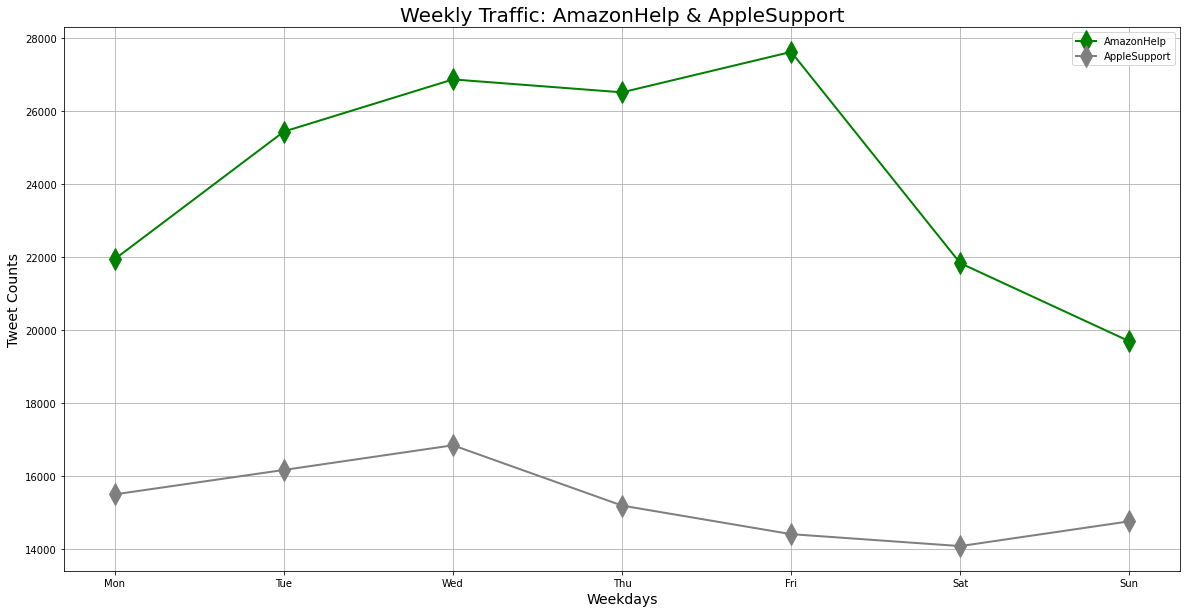

In [945]:
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_compare_final['Day'], amzn_compare_final['AmazonHelp'], color='green', marker='d',linewidth=2, markersize=15, label='AmazonHelp')
plt.plot(apple_compare_final['Day'], apple_compare_final['AppleSupport'], color='tab:gray', marker='d',linewidth=2, markersize=15, label='AppleSupport')

plt.title('Weekly Traffic: AmazonHelp & AppleSupport', fontsize=20)
plt.xlabel('Weekdays', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## Weekly Traffic: Uber_Support & AmazonHelp

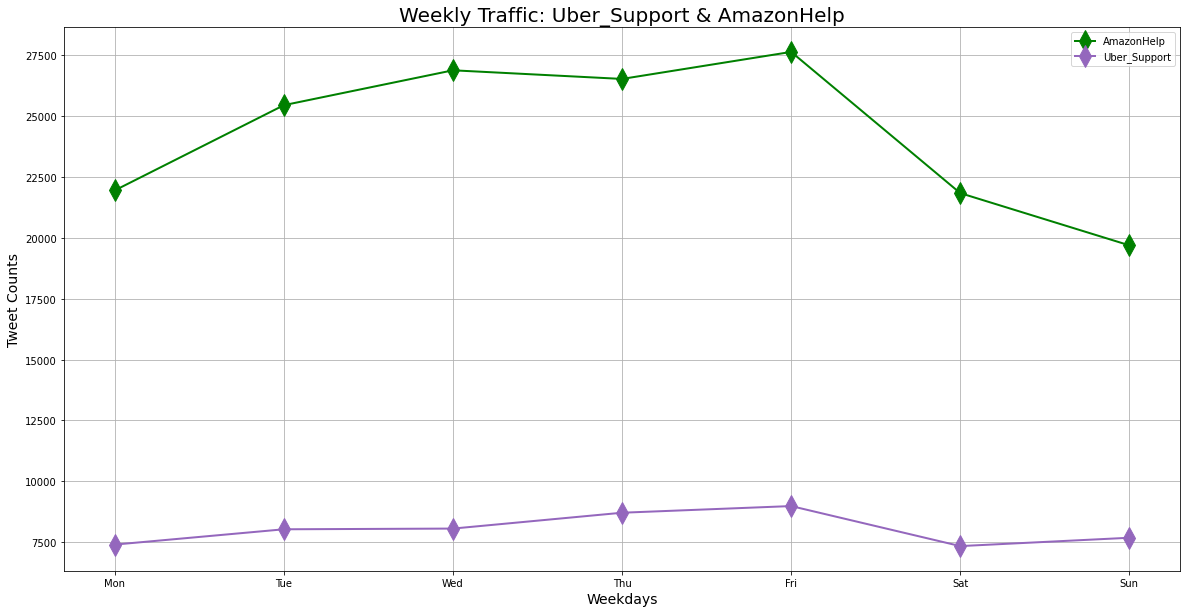

In [968]:
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_compare_final['Day'], amzn_compare_final['AmazonHelp'], color='green', marker='d',linewidth=2, markersize=15, label='AmazonHelp')
plt.plot(uber_compare_final['Day'], uber_compare_final['Uber_Support'], color='tab:purple', marker='d',linewidth=2, markersize=15, label='Uber_Support')

plt.title('Weekly Traffic: Uber_Support & AmazonHelp', fontsize=20)
plt.xlabel('Weekdays', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## Weekly Traffic: AppleSupport & Uber_Support

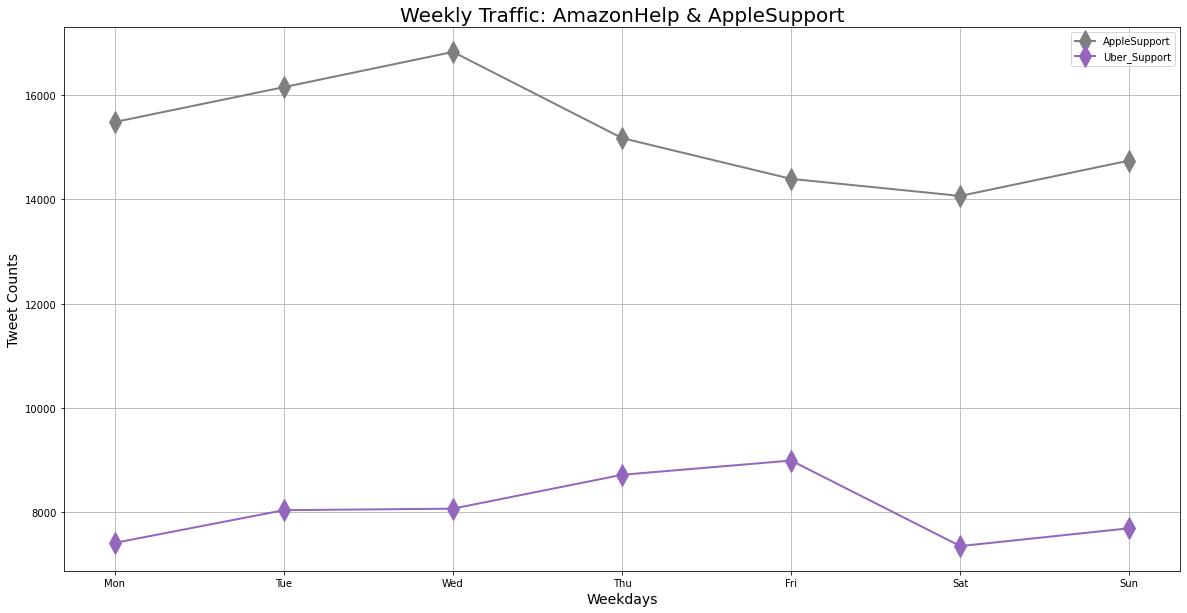

In [940]:
fig = plt.figure(figsize=(20,10))

plt.plot(apple_compare_final['Day'], apple_compare_final['AppleSupport'], color='tab:gray', marker='d',linewidth=2, markersize=15, label='AppleSupport')
plt.plot(uber_compare_final['Day'], uber_compare_final['Uber_Support'], color='tab:purple', marker='d',linewidth=2, markersize=15, label='Uber_Support')

plt.title('Weekly Traffic: AmazonHelp & AppleSupport', fontsize=20)
plt.xlabel('Weekdays', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## Weekly Traffic: AmazonHelp & AppleSupport & Uber_Support

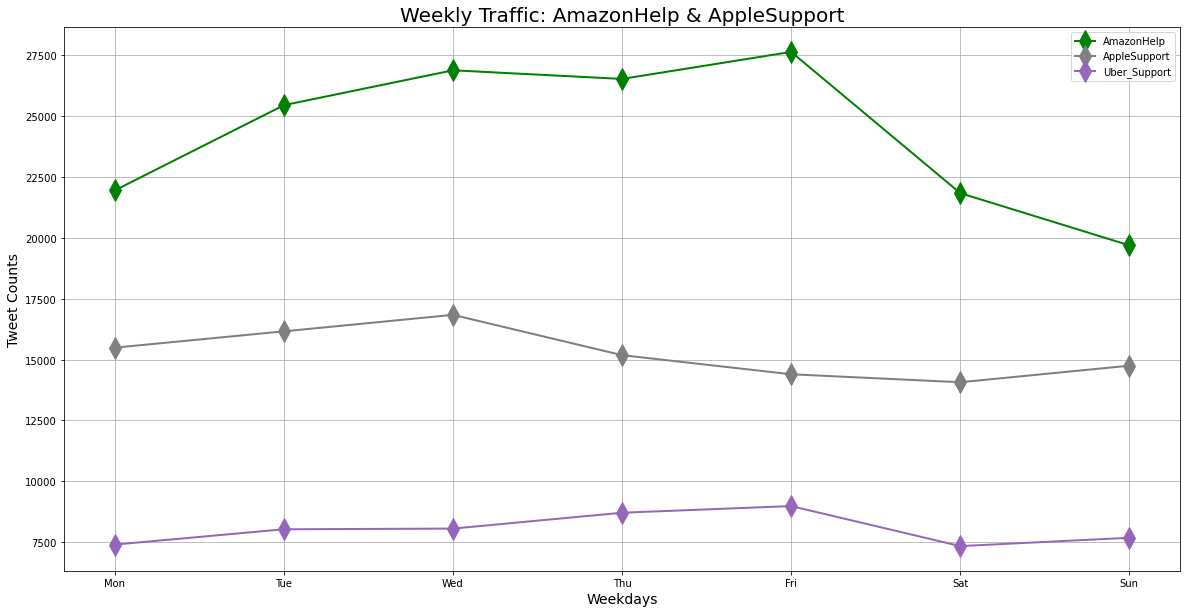

In [939]:
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_compare_final['Day'], amzn_compare_final['AmazonHelp'], color='green', marker='d',linewidth=2, markersize=15, label='AmazonHelp')
plt.plot(apple_compare_final['Day'], apple_compare_final['AppleSupport'], color='tab:gray', marker='d',linewidth=2, markersize=15, label='AppleSupport')
plt.plot(uber_compare_final['Day'], uber_compare_final['Uber_Support'], color='tab:purple', marker='d',linewidth=2, markersize=15, label='Uber_Support')

plt.title('Weekly Traffic: AmazonHelp & AppleSupport', fontsize=20)
plt.xlabel('Weekdays', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Comparing Weekly Traffic of Top Users to All Users

## Weekly Traffic: AmazonHelp & All Users

array([<AxesSubplot:xlabel='Day'>, <AxesSubplot:xlabel='Day'>],
      dtype=object)

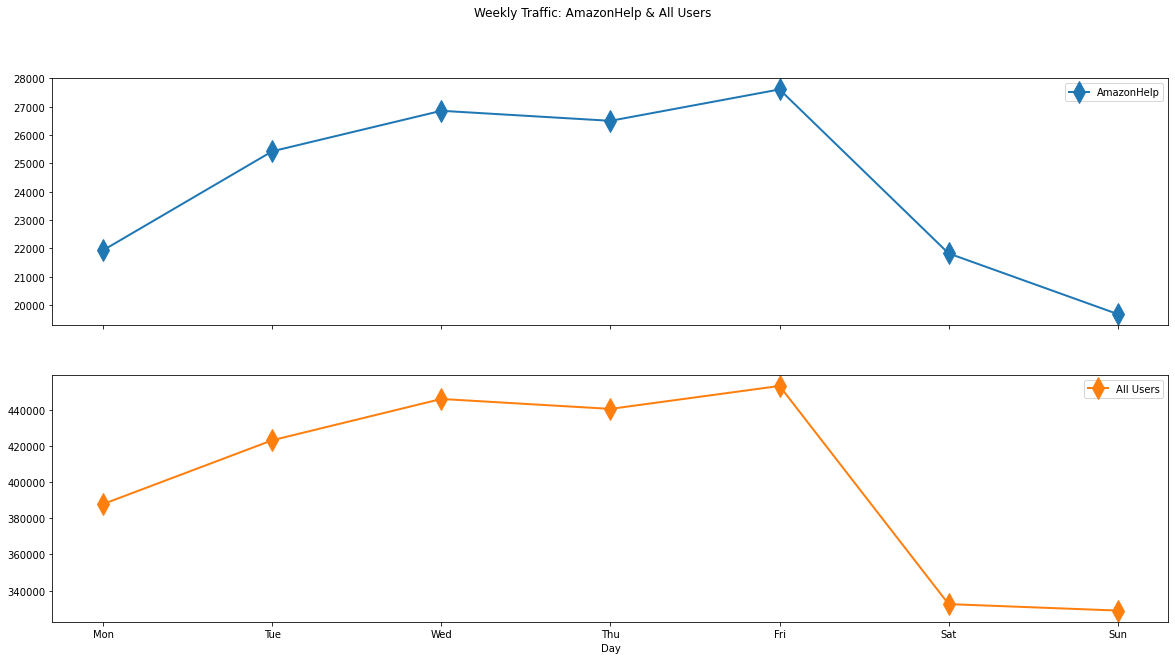

In [936]:
amzn_all = pd.merge(amzn_compare_final,all_compare_final)    
amzn_all.plot(figsize=(20,10),title='Weekly Traffic: AmazonHelp & All Users', x='Day',marker='d',linewidth=2, markersize=15,subplots=True)

In [899]:
amzn_all

,Day,AmazonHelp,All Users
0,Mon,21935,387847
1,Tue,25428,423052
2,Wed,26858,445838
3,Thu,26504,440361
4,Fri,27612,453028
5,Sat,21822,332606
6,Sun,19681,329042


## Weekly Traffic: AppleSupport & All Users

array([<AxesSubplot:xlabel='Day'>, <AxesSubplot:xlabel='Day'>],
      dtype=object)

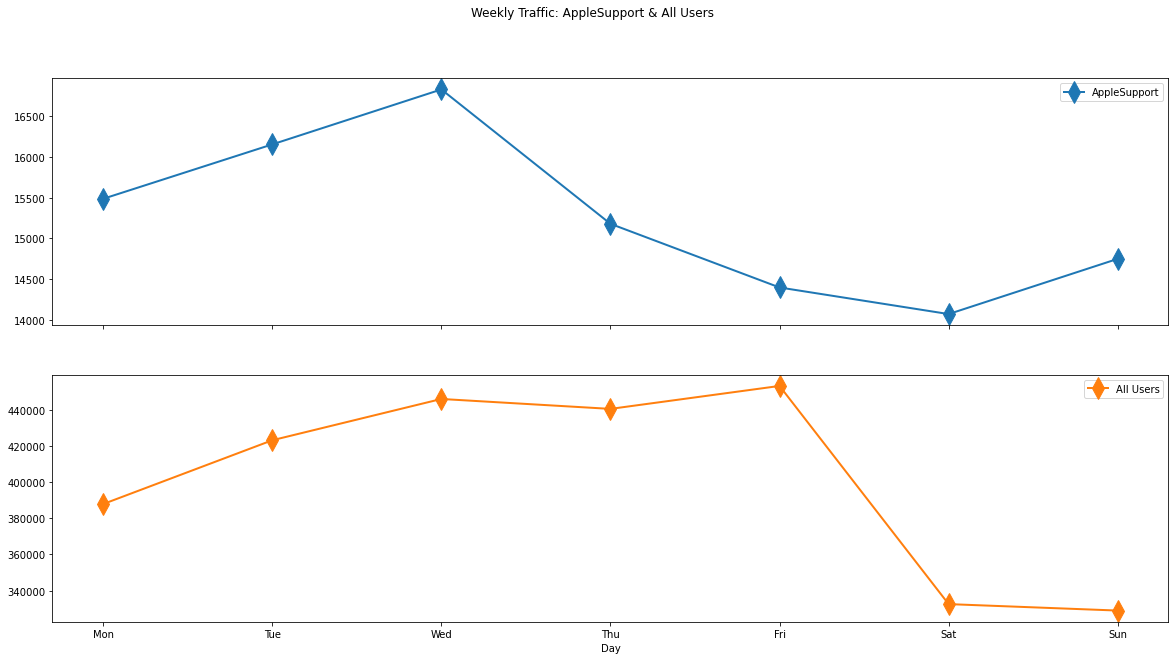

In [935]:
apple_all = pd.merge(apple_compare_final,all_compare_final)                                                                                                                                
apple_all.plot(figsize=(20,10),title='Weekly Traffic: AppleSupport & All Users', x='Day',marker='d',linewidth=2, markersize=15,subplots=True)

## Weekly Traffic: Uber_Support & All Users

array([<AxesSubplot:xlabel='Day'>, <AxesSubplot:xlabel='Day'>],
      dtype=object)

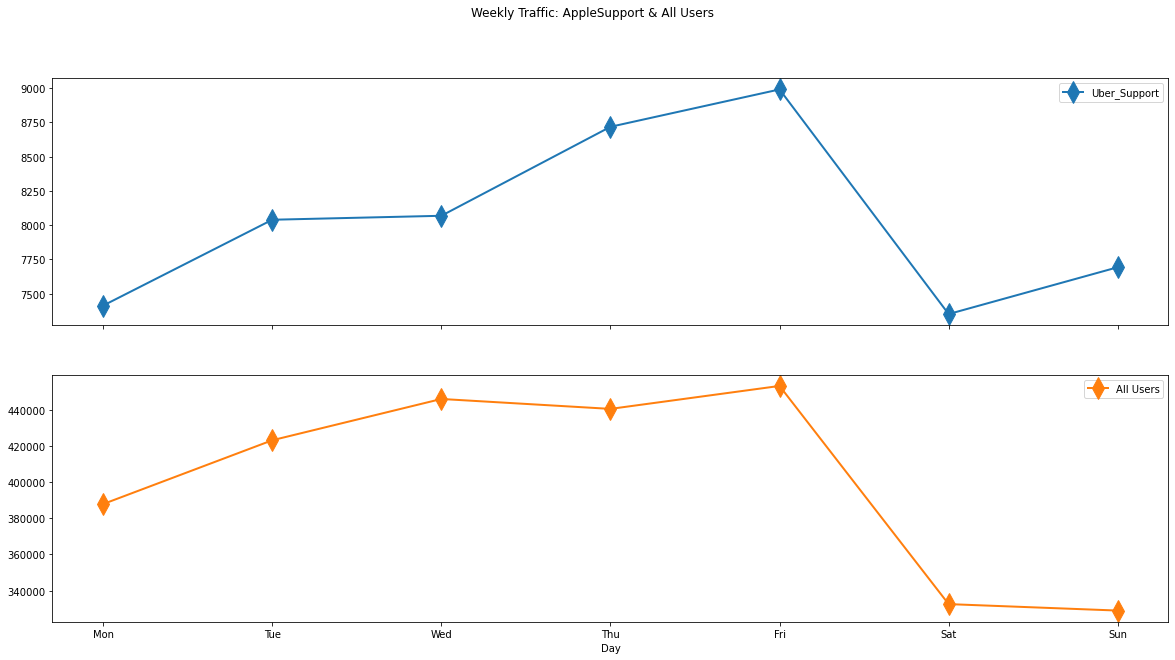

In [934]:
uber_all = pd.merge(uber_compare_final,all_compare_final)                                                                                                                                
uber_all.plot(figsize=(20,10),title='Weekly Traffic: AppleSupport & All Users', x='Day',marker='d',linewidth=2, markersize=15,subplots=True)

In [764]:
# New dataframe for comparing hourly traffic
dt = pd.DataFrame({'author_id': df['author_id'], 
                  'created_at':df['created_at']})

In [765]:
# Organize by date
dt['created_at'] = pd.to_datetime(dt['created_at'])
dt.sort_values(by='created_at', ascending = True,inplace=True)
dt['created_at']

706552    2008-05-08 20:13:59+00:00
706551    2008-05-08 21:04:16+00:00
1604529   2010-02-16 15:49:47+00:00
2129896   2010-03-31 15:24:29+00:00
2129894   2010-03-31 16:53:27+00:00
                     ...           
537559    2017-12-03 23:12:50+00:00
531793    2017-12-03 23:13:00+00:00
537388    2017-12-03 23:13:00+00:00
533916    2017-12-03 23:13:02+00:00
524147    2017-12-03 23:14:01+00:00
Name: created_at, Length: 2811774, dtype: datetime64[ns, UTC]

In [766]:
# Make 'created_at' column a datetime value
datetime = pd.to_datetime(dt['created_at'])
datetime.head()

706552    2008-05-08 20:13:59+00:00
706551    2008-05-08 21:04:16+00:00
1604529   2010-02-16 15:49:47+00:00
2129896   2010-03-31 15:24:29+00:00
2129894   2010-03-31 16:53:27+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [772]:
# Sort by ascending order
datetime.sort_values(inplace=True)

706552    2008-05-08 20:13:59+00:00
706551    2008-05-08 21:04:16+00:00
1604529   2010-02-16 15:49:47+00:00
2129896   2010-03-31 15:24:29+00:00
2129894   2010-03-31 16:53:27+00:00
                     ...           
537559    2017-12-03 23:12:50+00:00
531793    2017-12-03 23:13:00+00:00
537388    2017-12-03 23:13:00+00:00
533916    2017-12-03 23:13:02+00:00
524147    2017-12-03 23:14:01+00:00
Name: created_at, Length: 2811774, dtype: datetime64[ns, UTC]

In [773]:
# Keep only values in 2017
filt = (datetime >= '2017')
dff = datetime.loc[filt]
dff

1406992   2017-01-01 15:27:37+00:00
1406984   2017-01-01 15:43:04+00:00
1406985   2017-01-01 15:45:03+00:00
1406986   2017-01-01 15:55:16+00:00
1406987   2017-01-01 15:58:40+00:00
                     ...           
537559    2017-12-03 23:12:50+00:00
531793    2017-12-03 23:13:00+00:00
537388    2017-12-03 23:13:00+00:00
533916    2017-12-03 23:13:02+00:00
524147    2017-12-03 23:14:01+00:00
Name: created_at, Length: 2809474, dtype: datetime64[ns, UTC]

# Hourly Traffic

## Hourly Traffic: All Users

In [970]:
dff.dt.hour

1406992    15
1406984    15
1406985    15
1406986    15
1406987    15
           ..
537559     23
531793     23
537388     23
533916     23
524147     23
Name: created_at, Length: 2809474, dtype: int64

In [810]:
dt['Hours Count'] = dff.dt.hour
hour_count = pd.DataFrame({'Twitter Count':dt['Hours Count'].value_counts()})
sorted_hour_initial = hour_count.sort_index(ascending=True)
sorted_hour_initial.head(5)

,Twitter Count
0.0,113227
1.0,107710
2.0,98028
3.0,88502
4.0,78907


In [811]:
sorted_hour_final = sorted_hour_initial.reset_index(level=0)
sorted_hour_final = sorted_hour_final.rename(columns={'index':'Hour'})
sorted_hour_final.head(5)

,Hour,Twitter Count
0,0.0,113227
1,1.0,107710
2,2.0,98028
3,3.0,88502
4,4.0,78907


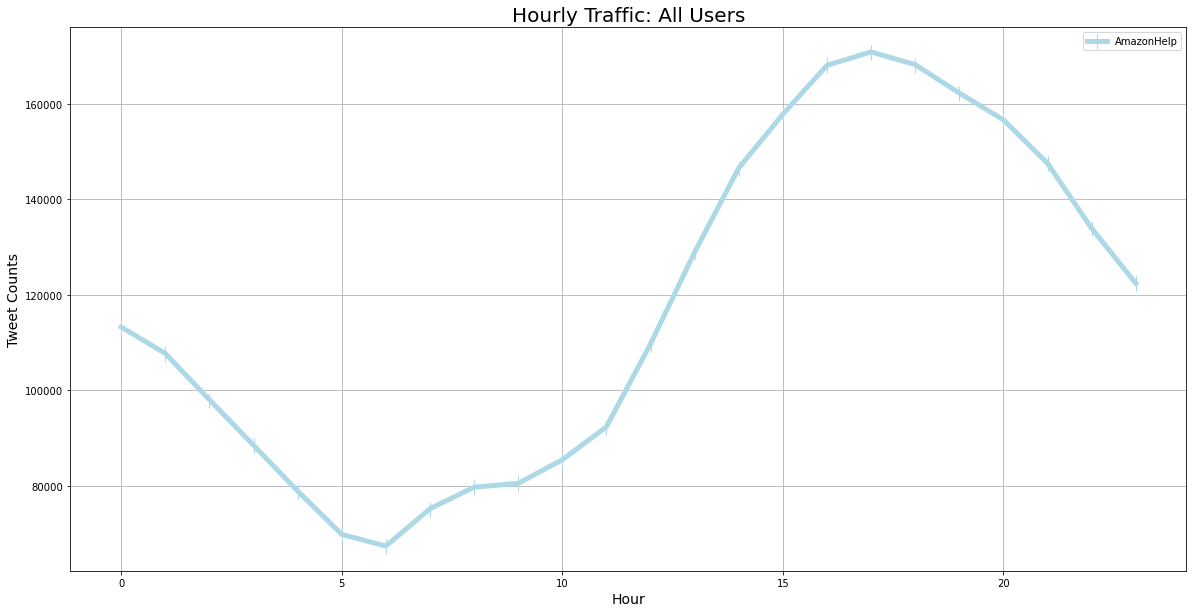

In [962]:
fig = plt.figure(figsize=(20,10))

plt.plot(sorted_hour_final['Hour'], sorted_hour_final['Twitter Count'], color='#ADD8E6', marker='|',linewidth=5, markersize=15, label='AmazonHelp')

plt.title('Hourly Traffic: All Users', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# New dataset for AmazonHelp to be used to be merged with others
dt['Hours Count'] = dff.dt.hour
hour_count_compare = pd.DataFrame({'All Users Count':dt['Hours Count'].value_counts()})
sorted_hour_compare_initial = hour_count_compare.sort_index(ascending=True)
sorted_hour_compare_final = sorted_hour_compare_initial.reset_index(level=0)
sorted_hour_compare_final = sorted_hour_compare_final.rename(columns={'index':'Hour'})
sorted_hour_compare_final.head(5)

## Hourly Traffic: AmazonHelp

In [872]:
# New dataframe for Amazon hourly traffic in 2017
dfamzn = pd.DataFrame({'author_id': df['author_id'],'created_at':df['created_at']})
amzn_time = dfamzn[dfamzn['author_id'].str.contains(pat='AmazonHelp')]
amzn_time['created_at'] = pd.to_datetime(dt['created_at'])
amzn_time.sort_values(by='created_at', ascending = True,inplace=True)
amzn_time.head()

,author_id,created_at
576269,AmazonHelp,2015-06-13 02:16:59+00:00
322256,AmazonHelp,2015-06-26 19:41:21+00:00
322249,AmazonHelp,2015-06-26 23:52:06+00:00
322251,AmazonHelp,2015-06-27 07:41:36+00:00
104320,AmazonHelp,2015-07-17 14:36:17+00:00


In [851]:
amzn_time['Hours Count'] = dff.dt.hour
amzn_hour_count = pd.DataFrame({'Twitter Count':amzn_time['Hours Count'].value_counts()})
amzn_sorted_hour_initial = amzn_hour_count.sort_index(ascending=True)
amzn_sorted_hour_initial.head()

,Twitter Count
0.0,4573
1.0,4844
2.0,4517
3.0,5093
4.0,5246


In [852]:
amzn_sorted_hour_final = amzn_sorted_hour_initial.reset_index(level=0)
amzn_sorted_hour_final = amzn_sorted_hour_final.rename(columns={'index':'Hour'})
amzn_sorted_hour_final.head(5)

,Hour,Twitter Count
0,0.0,4573
1,1.0,4844
2,2.0,4517
3,3.0,5093
4,4.0,5246


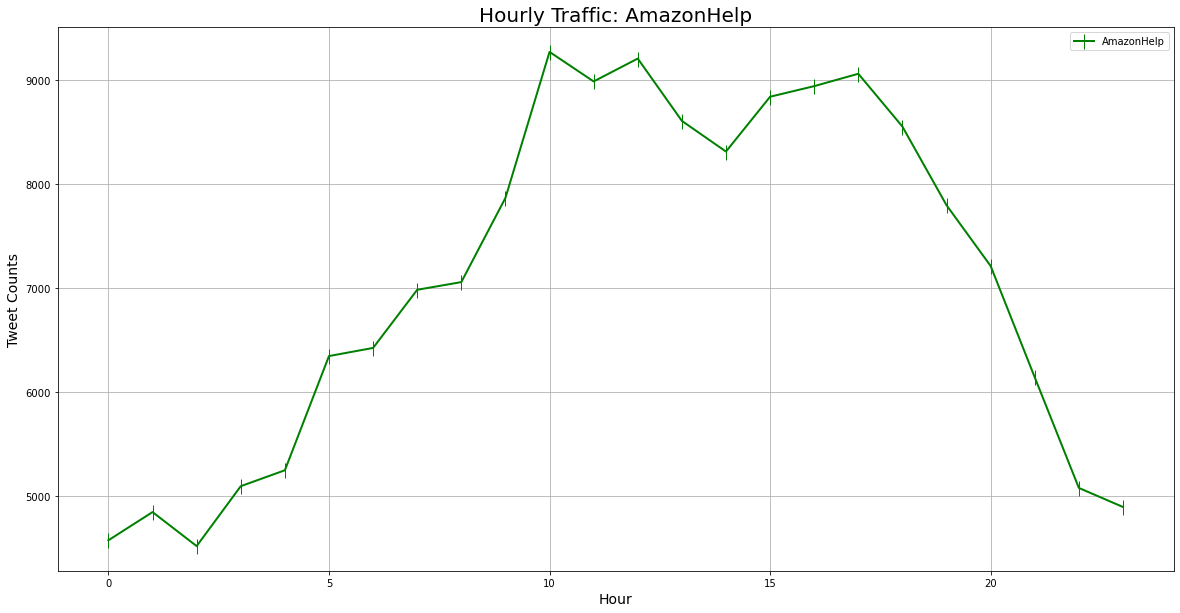

In [931]:
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_sorted_hour_final['Hour'], amzn_sorted_hour_final['Twitter Count'], color='green', marker='|',linewidth=2, markersize=15, label='AmazonHelp')

plt.title('Hourly Traffic: AmazonHelp', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# New dataset for AmazonHelp to be used to be merged with others
amzn_time['Hours Count'] = dff.dt.hour
amzn_hour_compare = pd.DataFrame({'AmazonHelp Count':amzn_time['Hours Count'].value_counts()})
amzn_sorted_hour_compare_initial = amzn_hour_compare.sort_index(ascending=True)
amzn_sorted_hour_compare_final = amzn_sorted_hour_compare_initial.reset_index(level=0)
amzn_sorted_hour_compare_final = amzn_sorted_hour_compare_final.rename(columns={'index':'Hour'})
amzn_sorted_hour_compare_final.head(5)

## Hourly Traffic: AppleSupport

In [873]:
# New dataframe for Amazon hourly traffic in 2017
dfapple = pd.DataFrame({'author_id': df['author_id'],'created_at':df['created_at']})
apple_time = dfapple[dfapple['author_id'].str.contains(pat='AppleSupport')]
apple_time['created_at'] = pd.to_datetime(dt['created_at'])
apple_time.sort_values(by='created_at', ascending = True,inplace=True)
apple_time.head()

,author_id,created_at
2660047,AppleSupport,2016-03-03 13:00:08+00:00
317375,AppleSupport,2016-03-04 20:44:00+00:00
2666889,AppleSupport,2016-04-04 23:03:31+00:00
120098,AppleSupport,2016-04-10 00:27:30+00:00
1135247,AppleSupport,2016-10-01 02:03:26+00:00


In [874]:
apple_time['Hours Count'] = dff.dt.hour
apple_hour_count = pd.DataFrame({'Twitter Count':apple_time['Hours Count'].value_counts()})
apple_sorted_hour_initial = apple_hour_count.sort_index(ascending=True)
apple_sorted_hour_initial.head()

,Twitter Count
0.0,5417
1.0,5012
2.0,4870
3.0,3894
4.0,2033


In [886]:
apple_sorted_hour_final = apple_sorted_hour_initial.reset_index(level=0)
apple_sorted_hour_final = apple_sorted_hour_final.rename(columns={'index':'Hour'})
apple_sorted_hour_final.head()

,Hour,Twitter Count
0,0.0,5417
1,1.0,5012
2,2.0,4870
3,3.0,3894
4,4.0,2033


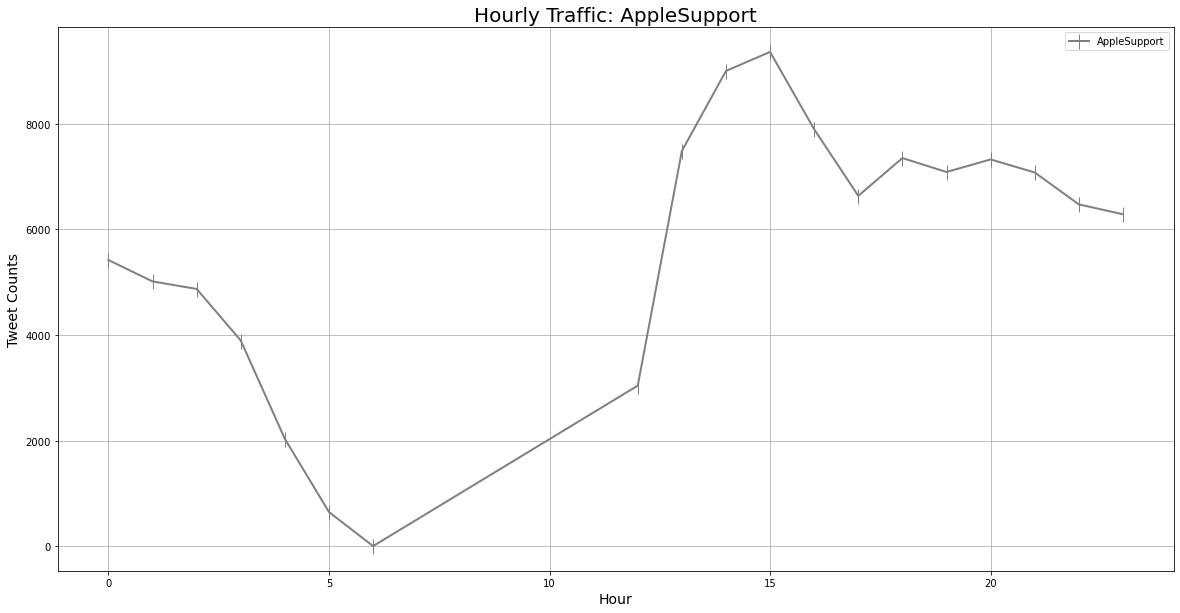

In [930]:
fig = plt.figure(figsize=(20,10))

plt.plot(apple_sorted_hour_final['Hour'], apple_sorted_hour_final['Twitter Count'], color='gray', marker='|',linewidth=2, markersize=15, label='AppleSupport')

plt.title('Hourly Traffic: AppleSupport', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [957]:
# New dataset for AppleSupport to be used to be merged with others
apple_time['Hours Count'] = dff.dt.hour
apple_hour_compare = pd.DataFrame({'AppleSupport Count':apple_time['Hours Count'].value_counts()})
apple_sorted_hour_compare_initial = apple_hour_compare.sort_index(ascending=True)
apple_sorted_hour_compare_final = apple_sorted_hour_compare_initial.reset_index(level=0)
apple_sorted_hour_compare_final = apple_sorted_hour_compare_final.rename(columns={'index':'Hour'})
apple_sorted_hour_compare_final.head(5)

,Hour,AppleSupport Count
0,0.0,5417
1,1.0,5012
2,2.0,4870
3,3.0,3894
4,4.0,2033


## Hourly Traffic: Uber_Support

In [878]:
# New dataframe for Amazon hourly traffic in 2017
dfuber = pd.DataFrame({'author_id': df['author_id'],'created_at':df['created_at']})
uber_time = dfuber[dfuber['author_id'].str.contains(pat='Uber_Support')]
uber_time['created_at'] = pd.to_datetime(dt['created_at'])
uber_time.sort_values(by='created_at', ascending = True,inplace=True)
uber_time.head()

,author_id,created_at
1308255,Uber_Support,2014-12-20 00:00:42+00:00
1155457,Uber_Support,2015-04-16 16:56:32+00:00
1434587,Uber_Support,2015-07-20 07:53:15+00:00
1707408,Uber_Support,2015-08-06 22:51:01+00:00
2303720,Uber_Support,2015-10-29 22:41:26+00:00


In [880]:
uber_time['Hours Count'] = dff.dt.hour
uber_hour_count = pd.DataFrame({'Twitter Count':uber_time['Hours Count'].value_counts()})
uber_sorted_hour_initial = uber_hour_count.sort_index(ascending=True)
uber_sorted_hour_initial.head()

,Twitter Count
0.0,2153
1.0,2044
2.0,2256
3.0,2285
4.0,2406


In [911]:
uber_sorted_hour_final = uber_sorted_hour_initial.reset_index(level=0)
uber_sorted_hour_final = uber_sorted_hour_final.rename(columns={'index':'Hour'})
uber_sorted_hour_final.head()

,Hour,Twitter Count
0,0.0,2153
1,1.0,2044
2,2.0,2256
3,3.0,2285
4,4.0,2406


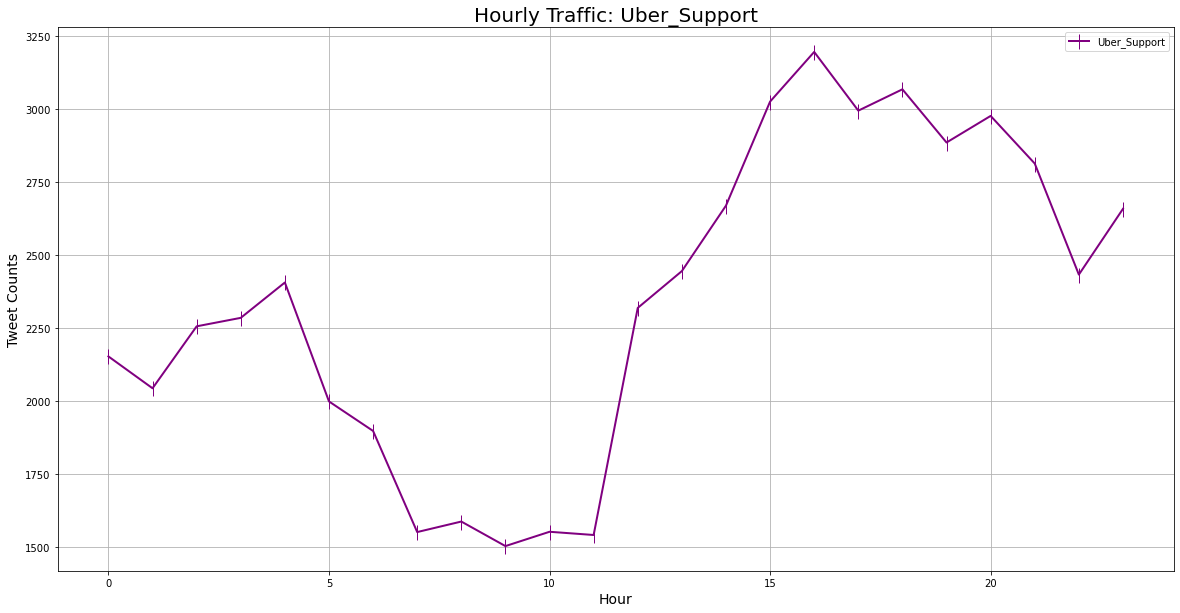

In [929]:
fig = plt.figure(figsize=(20,10))

plt.plot(uber_sorted_hour_final['Hour'], uber_sorted_hour_final['Twitter Count'], color='purple', marker='|',linewidth=2, markersize=15, label='Uber_Support')

plt.title('Hourly Traffic: Uber_Support', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [958]:
# New dataset for Uber_Support to be used to be merged with others
uber_time['Hours Count'] = dff.dt.hour
uber_hour_compare = pd.DataFrame({'Uber_Support Count':uber_time['Hours Count'].value_counts()})
uber_sorted_hour_compare_initial = uber_hour_compare.sort_index(ascending=True)
uber_sorted_hour_compare_final = uber_sorted_hour_compare_initial.reset_index(level=0)
uber_sorted_hour_compare_final = uber_sorted_hour_compare_final.rename(columns={'index':'Hour'})
uber_sorted_hour_compare_final.head(5)

,Hour,Uber_Support Count
0,0.0,2153
1,1.0,2044
2,2.0,2256
3,3.0,2285
4,4.0,2406


# Comparing Hourly Traffic of Top Users to Each Other

## Hourly Traffic: AmazonHelp & Apple_Support

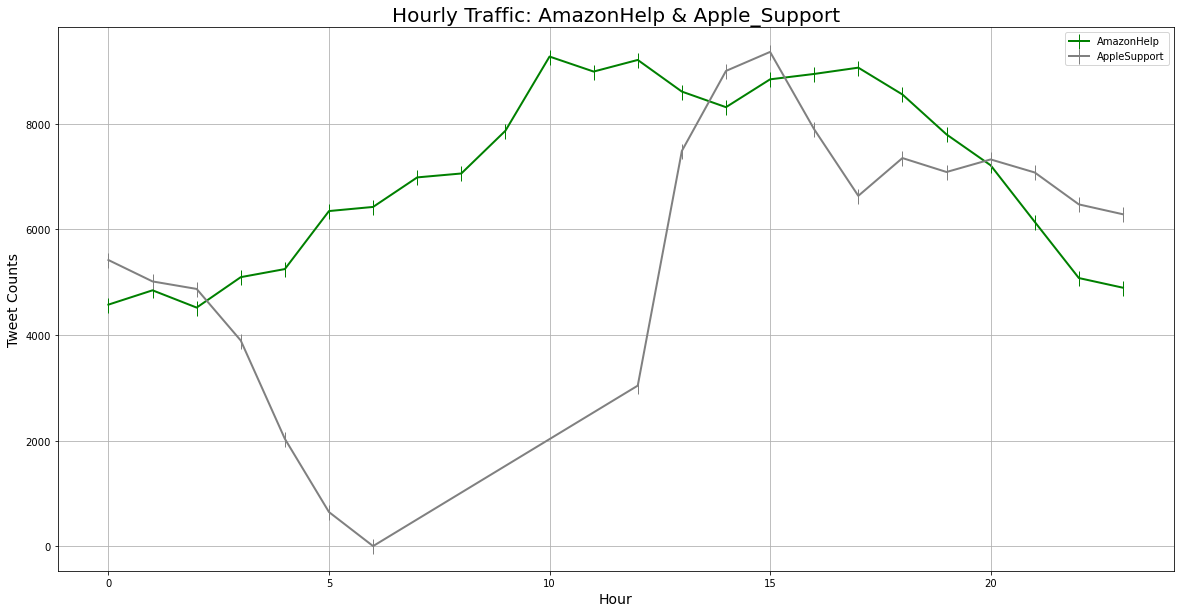

In [928]:
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_sorted_hour_final['Hour'], amzn_sorted_hour_final['Twitter Count'], color='green', marker='|',linewidth=2, markersize=15, label='AmazonHelp')
plt.plot(apple_sorted_hour_final['Hour'], apple_sorted_hour_final['Twitter Count'], color='gray', marker='|',linewidth=2, markersize=15, label='AppleSupport')

plt.title('Hourly Traffic: AmazonHelp & Apple_Support', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## Hourly Traffic: Uber_Support & AmazonHelp

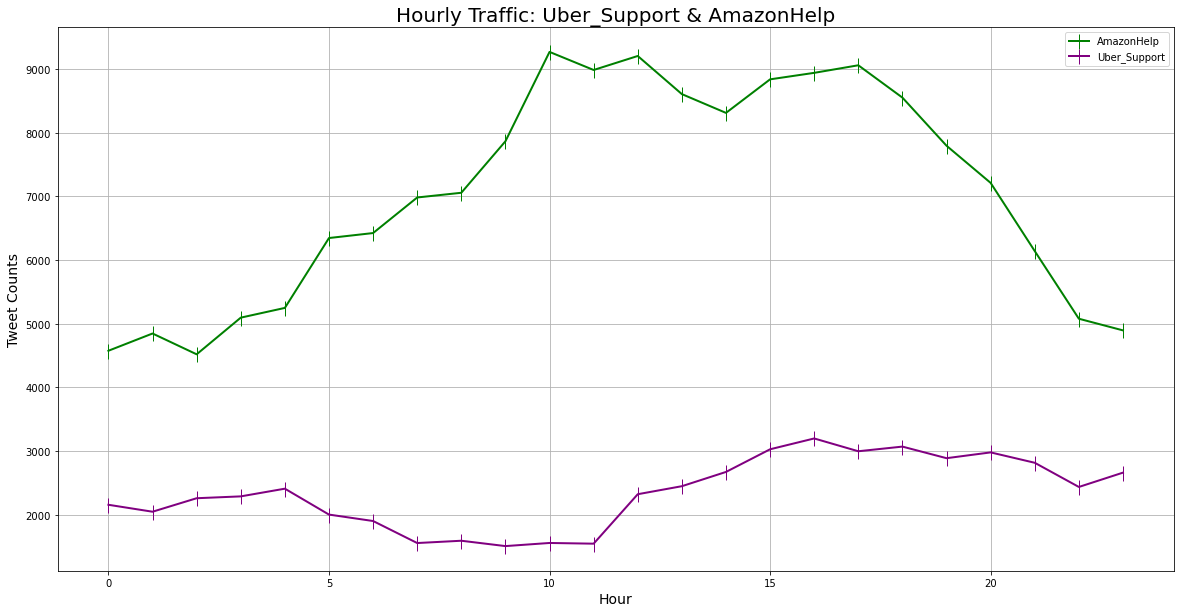

In [927]:
fig = plt.figure(figsize=(20,10))

plt.plot(amzn_sorted_hour_final['Hour'], amzn_sorted_hour_final['Twitter Count'], color='green', marker='|',linewidth=2, markersize=15, label='AmazonHelp')
plt.plot(uber_sorted_hour_final['Hour'], uber_sorted_hour_final['Twitter Count'], color='purple', marker='|',linewidth=2, markersize=15, label='Uber_Support')

plt.title('Hourly Traffic: Uber_Support & AmazonHelp', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## Hourly Traffic: AppleSupport & Uber_Support

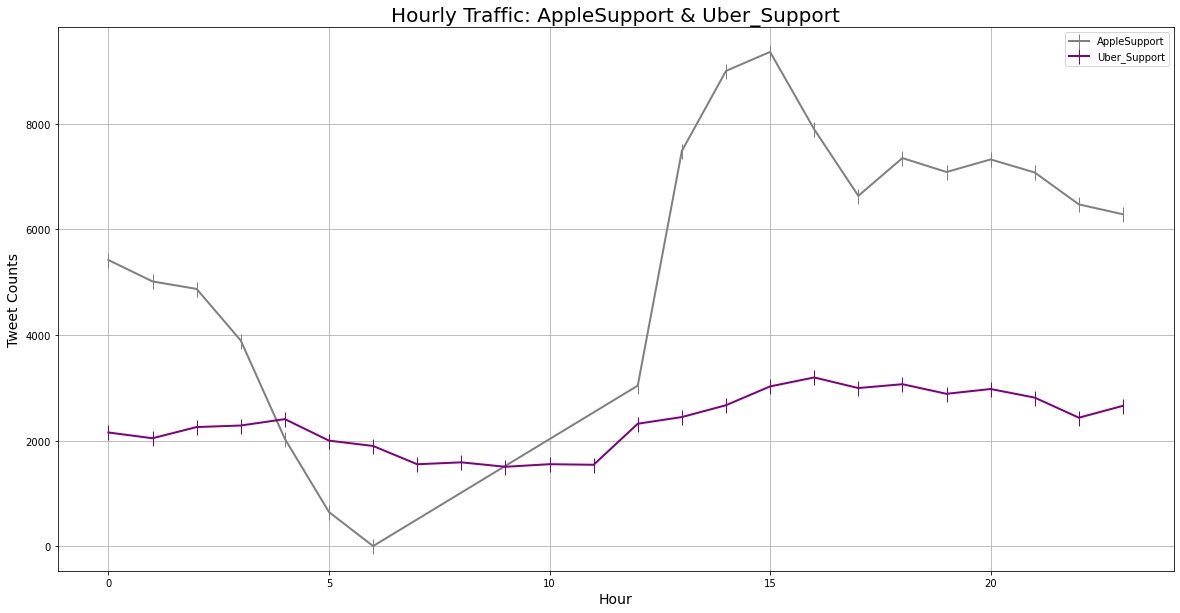

In [926]:
fig = plt.figure(figsize=(20,10))

plt.plot(apple_sorted_hour_final['Hour'], apple_sorted_hour_final['Twitter Count'], color='gray', marker='|',linewidth=2, markersize=15, label='AppleSupport')
plt.plot(uber_sorted_hour_final['Hour'], uber_sorted_hour_final['Twitter Count'], color='purple', marker='|',linewidth=2, markersize=15, label='Uber_Support')

plt.title('Hourly Traffic: AppleSupport & Uber_Support', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

## Hourly Traffic: AmazonHelp & AppleSupport & Uber_Support

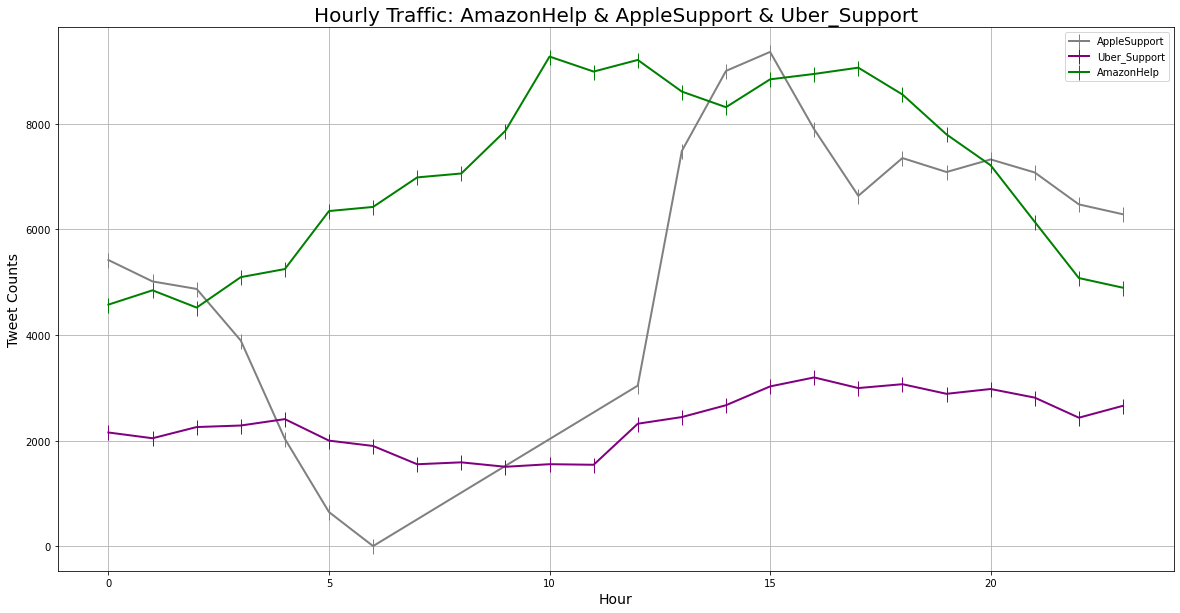

In [925]:
fig = plt.figure(figsize=(20,10))

plt.plot(apple_sorted_hour_final['Hour'], apple_sorted_hour_final['Twitter Count'], color='gray', marker='|',linewidth=2, markersize=15, label='AppleSupport')
plt.plot(uber_sorted_hour_final['Hour'], uber_sorted_hour_final['Twitter Count'], color='purple', marker='|',linewidth=2, markersize=15, label='Uber_Support')
plt.plot(amzn_sorted_hour_final['Hour'], amzn_sorted_hour_final['Twitter Count'], color='green', marker='|',linewidth=2, markersize=15, label='AmazonHelp')

plt.title('Hourly Traffic: AmazonHelp & AppleSupport & Uber_Support', fontsize=20)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Tweet Counts', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Comparing Hourly Traffic of Top Users to All Users

## Hourly Traffic: AmazonHelp & All Users

array([<AxesSubplot:xlabel='Hour'>, <AxesSubplot:xlabel='Hour'>],
      dtype=object)

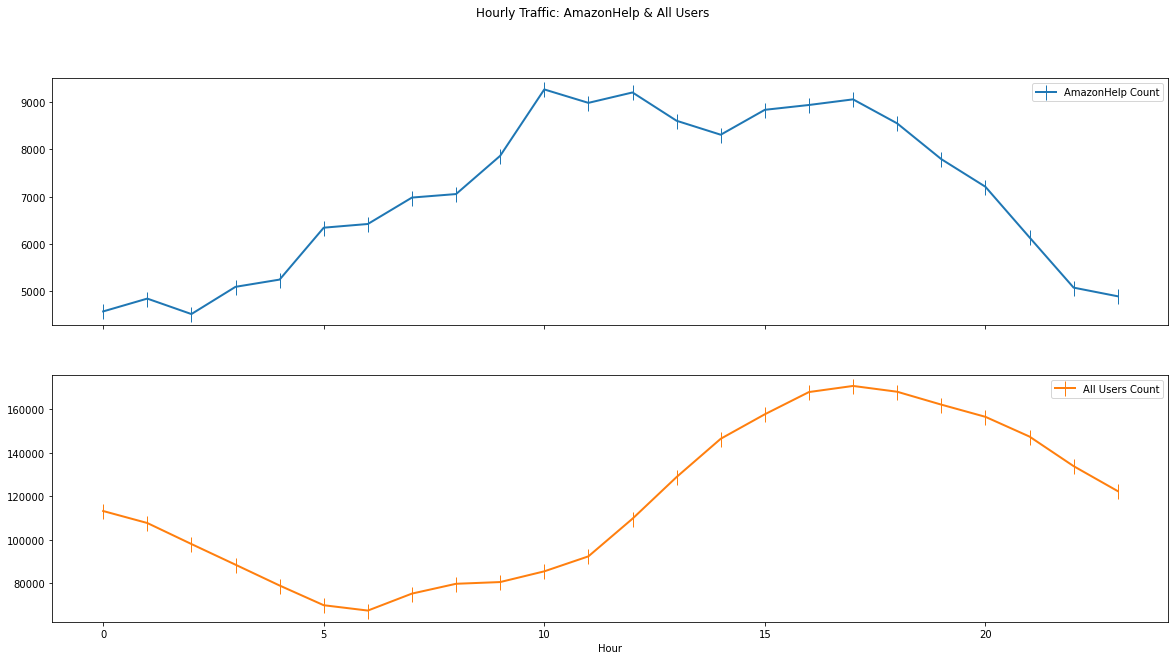

In [955]:
amzn_all_time = pd.merge(amzn_sorted_hour_compare_final,sorted_hour_compare_final)    
amzn_all_time.plot(figsize=(20, 10),title='Hourly Traffic: AmazonHelp & All Users', x='Hour',marker='|',linewidth=2, markersize=15,subplots=True)

## Hourly Traffic: AppleSupport & All Users

array([<AxesSubplot:xlabel='Hour'>, <AxesSubplot:xlabel='Hour'>],
      dtype=object)

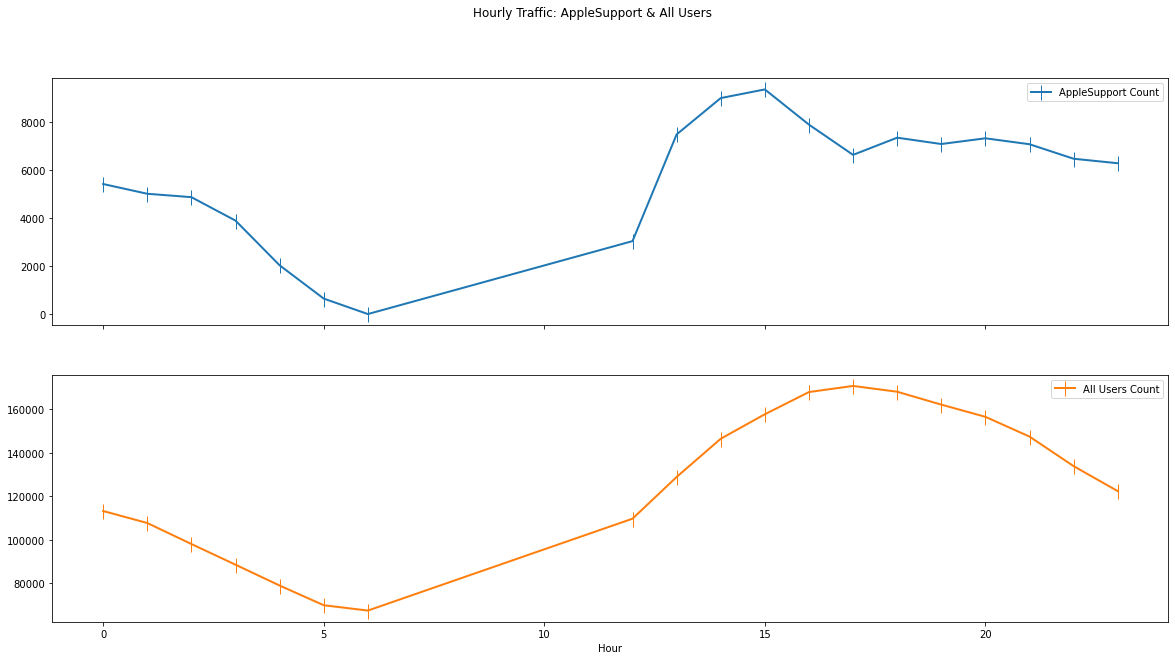

In [956]:
amzn_all_time = pd.merge(apple_sorted_hour_compare_final,sorted_hour_compare_final)    
amzn_all_time.plot(figsize=(20,10),title='Hourly Traffic: AppleSupport & All Users', x='Hour',marker='|',linewidth=2, markersize=15,subplots=True)

## Hourly Traffic: Uber_Support & All Users¶

array([<AxesSubplot:xlabel='Hour'>, <AxesSubplot:xlabel='Hour'>],
      dtype=object)

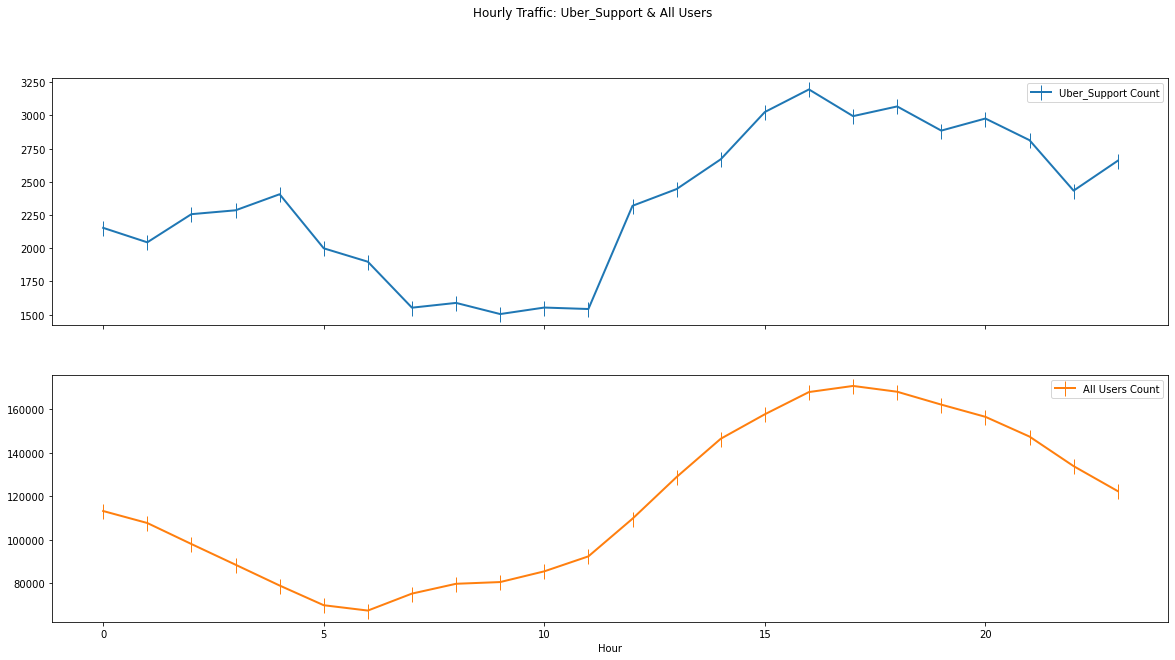

In [960]:
uber_all_time = pd.merge(uber_sorted_hour_compare_final,sorted_hour_compare_final)    
uber_all_time.plot(figsize=(20,10),title='Hourly Traffic: Uber_Support & All Users', x='Hour',marker='|',linewidth=2, markersize=15,subplots=True)


In [711]:
# Create a datetimeindex from dataframe
dateIndex = df.set_index('created_at', inplace=False, drop=True) 
dateIndex.head()

,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
created_at,,,,,,
Fri Apr 01 17:37:48 +0000 2016,2666295,751178,True,@AskSeagate Same issue Seagate. Is there a sol...,2666294,2666296.0
Fri Apr 01 18:22:40 +0000 2016,2666294,AskSeagate,False,@751178 Pls give us more clarification on your...,2666293,2666295.0
Fri Apr 01 18:25:52 +0000 2016,2666293,751178,True,@AskSeagate Bootstrap and media server daemon ...,2666291,2666294.0
Fri Apr 01 19:53:33 +0000 2016,2666291,AskSeagate,False,@751178 Pls use the link bellow to download th...,2666292,2666293.0
Fri Apr 03 19:57:41 +0000 2015,402549,211231,True,@AsurionCares How do I get a receipt of my mon...,402547,NaN


In [761]:
# New dataframe to analyze author_id and dates


In [762]:
dt

,author_id,created_at
2496505,751178,Fri Apr 01 17:37:48 +0000 2016
2496504,AskSeagate,Fri Apr 01 18:22:40 +0000 2016
2496503,751178,Fri Apr 01 18:25:52 +0000 2016
2496501,AskSeagate,Fri Apr 01 19:53:33 +0000 2016
352823,211231,Fri Apr 03 19:57:41 +0000 2015
...,...,...
2533273,759372,Wed Sep 28 13:34:20 +0000 2016
445058,236012,Wed Sep 28 16:03:15 +0000 2016
2533272,sainsburys,Wed Sep 28 18:03:12 +0000 2016
2533271,759372,Wed Sep 28 18:04:04 +0000 2016
